In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv(r"C:\Users\ali umar hasan\Desktop\data science\Dataset _assign_kmeans\csv's\Insurance Dataset.csv")

In [3]:
df.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [4]:
from sklearn.cluster import	KMeans
# from scipy.spatial.distance import cdist

In [5]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [6]:
df_norm = norm_func(df.iloc[:, 1:])

In [7]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

In [8]:
TWSS

[16.043669366856495,
 11.374877479842027,
 9.076373032168387,
 7.489063588274668,
 6.161959919616572,
 5.415800286044623,
 4.835756146589039]

Text(0, 0.5, 'total_within_SS')

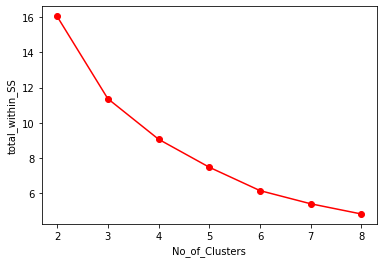

In [9]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")


In [11]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(df_norm)


KMeans(n_clusters=5)

In [12]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
df['clust'] = mb # creating a  new column and assigning it to new column 


In [15]:
df.head()


,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800,26,233,3890.076336,28000,4
1,2950,27,130,2294.444444,29500,1
2,3100,28,144,2564.545455,31000,1
3,3250,30,65,1978.260870,32500,1
4,3400,32,56,2009.090909,34000,1


In [14]:
df_norm.head()

,Age,Days to Renew,Claims made,Income
0,0.050847,0.725000,0.019569,0.000000
1,0.067797,0.403125,0.003236,0.010101
2,0.084746,0.446875,0.006001,0.020202
3,0.118644,0.200000,0.000000,0.030303
4,0.152542,0.171875,0.000316,0.040404


In [17]:
df.iloc[:,1:].groupby(df.clust).mean()


,Age,Days to Renew,Claims made,Income,clust
clust,,,,,
0,62.333333,185.800000,31349.680827,159900.000000,0
1,38.687500,73.500000,4304.096478,60015.625000,1
2,46.323529,66.588235,9232.834093,128279.411765,2
3,65.500000,245.125000,17512.951670,61000.000000,3
4,30.818182,243.272727,17809.369495,96045.454545,4
